# 7. Modelos Aditivos Generalizados (GAM)



Utilizamos un modelo de clasificacion de GAM  para identiciar si las casas son caras o baratas como habiamos visto anteriormente en los demás modelos.

El modelo de clasificación de GAM se rige por la siguiente ecuación. 

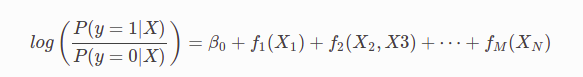

Primero  dividiremos los datos en train y test, para entrerar y probar los diferentes ajustes del modelo y finalmente realizaremos una validación del modelo elegido con los datos de validación. 



In [1]:
import numpy as np
import pandas as pd
from patsy import dmatrix
from matplotlib import pyplot as plt

import statsmodels.api as sm
from pygam import LinearGAM, s, GAM, l, te

In [2]:
# cargamos los datos
data_RF = pd.read_csv("./CSV/csv_precio_div.csv",sep=',')

data_RF = data_RF.drop('Unnamed: 0',axis=1)#eliminamos la primera columna. 

columns=['Distancia_NEW','Landsize','Longtitude','Lattitude','precio_div']
data=(data_RF[columns])


# Hemos separado  el 70%

# dividir el data set de forma aleatoria 

p_train = 0.70 # Porcentaje de train.

data['is_train'] = np.random.uniform(0, 1, len(data)) <= p_train
train, test = data[data['is_train']==True], data[data['is_train']==False]
df = data.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  15134
Ejemplos usados para test:  6520


<ipython-input-2-2ff80021a91b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_train'] = np.random.uniform(0, 1, len(data)) <= p_train


In [3]:
#Seleccion de varaibles
X = train[['Distancia_NEW','Landsize','Lattitude','Longtitude']].values
y = train['precio_div'].values

X_test=test[['Distancia_NEW','Landsize','Lattitude','Longtitude']].values
y_test=test['precio_div'].values

y =np.array(y).reshape(-1, 1)
y_test=y_test.reshape(-1, 1)


In [4]:
#NORMALIZACION
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(X)
#X= scaler.transform(X)
#X_test = scaler.transform(X_test)

## 7.1  Ajuste de hiperparámetros

En primerlugar, incorporamos todas las variables como splines en el modelo. 

In [5]:
gam = LogisticGAM(s(0)+ s(1)+s(2)+ s(3)).gridsearch(X, y)


gam.summary()


print("----------------------------------------------------------------------------------------")
print("GRAFICAS DE DEPENDENCIA PARCIAL")

fig, axs = plt.subplots(1, 4, figsize=(15,6))
titles = ['Distancia_NEW','Landsize','Lattitude','Longtitude']

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);




NameError: name 'LogisticGAM' is not defined

In [155]:

#PRECISION DEL MODELO

pred= gam.predict(X_test)
print(classification_report(y_test, pred))
print (" Accuracy del modelo con los datos de Train",gam.accuracy(X, y))
print (" Accuracy del modelo con los datos de Test", gam.accuracy(X_test, y_test))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66      3200
           1       0.67      0.80      0.73      3316

    accuracy                           0.70      6516
   macro avg       0.71      0.70      0.69      6516
weighted avg       0.70      0.70      0.69      6516

 Accuracy del modelo con los datos de Train 0.690579997357643
 Accuracy del modelo con los datos de Test 0.6982811540822591


En las gráficas de dependencia parcial podemos ver como cada una de las variables afecta al precio.La variable ' distance_NEW' tiene una correlación negativa con el precio, por lo tanto, cuanto mayor es esta más bajo será el precio. 

Con repecto a ' Latitude' y ' Longitude' podemos observar que  el precio varia en fución del punto en el que se encuentre, mientra que el 'Landsize' podemos considerar que la correlación es positiva, ya que cuanto mayor es el tamano de landsize mas caro es el precio. 

 Aplicamos tensor a Longitud y latitud ya que son dos variables que  están muy relacionadas. 
 

In [156]:
#Aplicamos tensor
gam_te = LogisticGAM(s(0)+ s(1)+te(2,3)).gridsearch(X, y)

gam_te.summary()

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/sit

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
 18% (2 of 11) |####                     | Elapsed Time: 0:00:11 ETA:   0:00:33/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 27% (3 of 11) |######                   | Elapsed Time: 0:00:12 ETA:   0:00:18/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     52.7747
Link Function:                        LogitLink Log Likelihood:                                 -8449.1733
Number of Samples:                        15138 AIC:                                             17003.896
                                                AICc:                                           17004.2866
                                                UBRE:                                                3.126
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1947
Feature Function                  Lam

<ipython-input-156-4ef1f92e85b7>:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_te.summary()


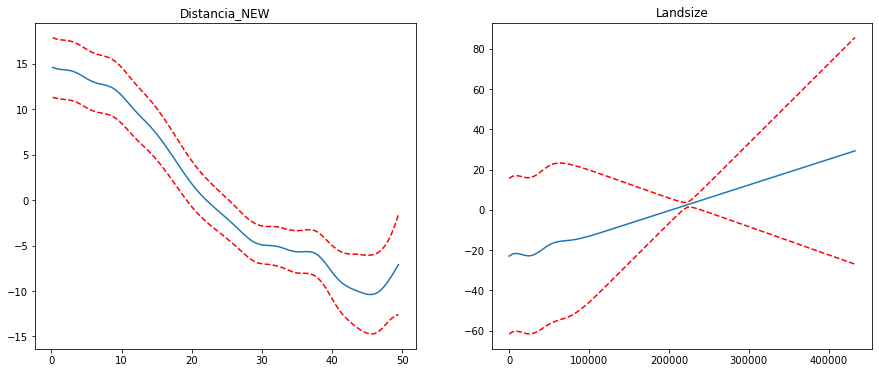

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
titles = ['Distancia_NEW','Landsize']

for i, ax in enumerate(axs):
    XX = gam_te.generate_X_grid(term=i)
    pdep, confi = gam_te.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);


N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
 27% (3 of 11) |######                   | Elapsed Time: 0:00:31 ETA:   0:01:19/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid valu

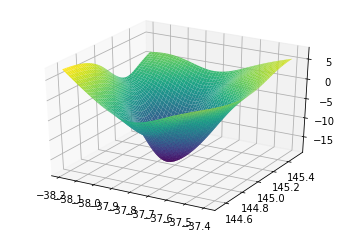

In [139]:
# Solo el tensor 
gam_te = LogisticGAM(s(0)+ te(2,3)+s(1)).gridsearch(X, y)
XX = gam_te.generate_X_grid(term=1, meshgrid=True)
Z = gam_te.partial_dependence(term=1, X=XX, meshgrid=True)

ax = plt.axes(projection='3d')
ax.plot_surface(XX[0], XX[1], Z, cmap='viridis')

Podemos observar que hay ciertas combinaciones de latitudes y longitudes donde el precio  tiende a ser menor en el centro de la grafica, sin embargo, otras presentan un  una relacion más positiva con el precio en los extremos. 

In [157]:
#PRECISION DEL MODELO

pred= gam_te.predict(X_test)
print(classification_report(y_test, pred))
print (" Accuracy del modelo con los datos de Train", gam_te.accuracy(X, y))
print (" Accuracy del modelo con los datos de Test", gam_te.accuracy(X_test, y_test))


              precision    recall  f1-score   support

           0       0.74      0.64      0.69      3200
           1       0.69      0.78      0.73      3316

    accuracy                           0.71      6516
   macro avg       0.72      0.71      0.71      6516
weighted avg       0.72      0.71      0.71      6516

 Accuracy del modelo con los datos de Train 0.7036596644206632
 Accuracy del modelo con los datos de Test 0.7124002455494168


Con el uso del tensor en las varibles 'lattitude' y ' longtitude' , aumenta  el valor de accuracy tanto en  en en los datos de train como en los de test. El valor f1-score se encuentra equilibrado entre los entre las dos clases. 


Después de comprobar que el uso de un tensor es beneficioso para  el ajuste del modelo, añadiremos una by-varaible sobre "latitudde" la variable "longitude".

In [158]:
#Interacción simple con by 
gam_by = LogisticGAM(s(0)+ s(1)+s(3, by=2)).gridsearch(X, y)# interaccions simple

gam_by.summary()
print('-------------------------------------------------------------------------------------')
print (" Accuracy del modelo con los datos de Train", gam_by.accuracy(X, y))

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/sit

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:44: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:44: RuntimeWarning: invalid value encountered in less_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/utils.py:725: RuntimeWarning: divide by zero encountered in true_divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/utils.py:725: RuntimeWarning: overflow encountered in true_divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
 18% (2 of 11) |####                     | Elapsed Time: 0:00:02 ETA:   0:00:11/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: Runtime

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:44: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:44: RuntimeWarning: invalid value encountered in less_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/utils.py:725: RuntimeWarning: divide by zero encountered in true_divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/utils.py:725: RuntimeWarning: overflow encountered in true_divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
 27% (3 of 11) |######                   | Elapsed Time: 0:00:03 ETA:   0:00:08/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: Runtime

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:44: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:44: RuntimeWarning: invalid value encountered in less_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/utils.py:725: RuntimeWarning: divide by zero encountered in true_divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/utils.py:725: RuntimeWarning: overflow encountered in true_divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
 36% (4 of 11) |#########                | Elapsed Time: 0:00:05 ETA:   0:00:08/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: Runtime

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:44: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:44: RuntimeWarning: invalid value encountered in less_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/utils.py:725: RuntimeWarning: divide by zero encountered in true_divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
 45% (5 of 11) |###########              | Elapsed Time: 0:00:06 ETA:   0:00:08/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarnin

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:44: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:44: RuntimeWarning: invalid value encountered in less_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/utils.py:725: RuntimeWarning: divide by zero encountered in true_divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
 54% (6 of 11) |#############            | Elapsed Time: 0:00:08 ETA:   0:00:08/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarnin

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:44: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:44: RuntimeWarning: invalid value encountered in less_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/utils.py:725: RuntimeWarning: divide by zero encountered in true_divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/utils.py:725: RuntimeWarning: overflow encountered in true_divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
 63% (7 of 11) |###############          | Elapsed Time: 0:00:09 ETA:   0:00:06/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: Runtime

did not converge


 72% (8 of 11) |##################       | Elapsed Time: 0:00:11 ETA:   0:00:04/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 81% (9 of 11) |####################     | Elapsed Time: 0:00:11 ETA:   0:00:02/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     24.8026
Link Function:                        LogitLink Log Likelihood:                                 -8884.5117
Number of Samples:                        15138 AIC:                                            17818.6286
                                                AICc:                                           17818.7201
                                                UBRE:                                               3.1784
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1533
Feature Function                  Lam

In [160]:
#PRECISION DEL MODELO

pred= gam_by.predict(X_test)
print(classification_report(y_test, pred))
print (" Accuracy del modelo con los datos de Train", gam_by.accuracy(X, y))
print (" Accuracy del modelo con los datos de Test", gam_by.accuracy(X_test, y_test))


              precision    recall  f1-score   support

           0       0.69      0.58      0.63      3200
           1       0.65      0.75      0.70      3316

    accuracy                           0.67      6516
   macro avg       0.67      0.67      0.67      6516
weighted avg       0.67      0.67      0.67      6516

 Accuracy del modelo con los datos de Train 0.6625049544193421
 Accuracy del modelo con los datos de Test 0.6685082872928176


Aunque el resultado es mejor que el de las dos variables por separado, tanto en los datos de train como los de test tiene un mejor ajuste del  modelo en cuando usamos el tensor. Seguiremos ajustando el modelo haciendo uso del tensor en  las variables anteriormente mencionadas. 


### Ajuste de hiperparámetros 

Ajustamos los hiperparámetros para ver como afecta el número de splines(n_splines), si es necesario  necesario añadir una costante(fit_intercept), el número de interacciones permitidas (max_inter)y  lambda (lam). 

#### Lambda 


Seleccionamos los mejores lambdas de entre un rango aleatorio priemro y después probamos con 0.6 ya que suele ser el valor estandar. 

In [161]:
#MODELO 1 

#Ajustamos Lambda aleatorio

lams = np.random.rand(100, 4)
lams = lams * 11 - 3
lams = np.exp(lams)
#print(lams.shape)

fit_intercept=True
n_splines=10
max_iter=100

model = LogisticGAM(s(0)+ s(1)+te(2,3), fit_intercept=fit_intercept , n_splines=n_splines, max_iter=max_iter).gridsearch(X, y,  lam=lams)
model.summary()
print("_________________________________________________________________________________________________")
print (" Accuracy del modelo con los datos de Train del Modelo 1 ", model.accuracy(X_test, y_test))

  1% (1 of 100) |                        | Elapsed Time: 0:00:01 ETA:   0:01:40/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  2% (2 of 100) |                        | Elapsed Time: 0:00:01 ETA:   0:01:30/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 14% (14 of 100) |###                    | Elapsed Time: 0:00:13 ETA:   0:01:49/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 15% (15 of 100) |###                    | Elapsed Time: 0:00:14 ETA:   0:01:37/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 28% (28 of 100) |######                 | Elapsed Time: 0:00:25 ETA:   0:01:02/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 29% (29 of 100) |######                 | Elapsed Time: 0:00:25 ETA:   0:01:01/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 41% (41 of 100) |#########              | Elapsed Time: 0:00:35 ETA:   0:00:46/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 42% (42 of 100) |#########              | Elapsed Time: 0:00:36 ETA:   0:00:45/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 54% (54 of 100) |############           | Elapsed Time: 0:00:46 ETA:   0:00:32/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 55% (55 of 100) |############           | Elapsed Time: 0:00:47 ETA:   0:00:33/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 69% (69 of 100) |###############        | Elapsed Time: 0:00:58 ETA:   0:00:26/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 70% (70 of 100) |################       | Elapsed Time: 0:00:59 ETA:   0:00:25/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 82% (82 of 100) |##################     | Elapsed Time: 0:01:09 ETA:   0:00:13/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 83% (83 of 100) |###################    | Elapsed Time: 0:01:10 ETA:   0:00:18/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 96% (96 of 100) |###################### | Elapsed Time: 0:01:21 ETA:   0:00:03/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 97% (97 of 100) |###################### | Elapsed Time: 0:01:22 ETA:   0:00:02/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     25.7346
Link Function:                        LogitLink Log Likelihood:                                 -8690.8525
Number of Samples:                        15138 AIC:                                            17433.1742
                                                AICc:                                           17433.2723
                                                UBRE:                                                3.153
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1717
Feature Function                  Lam

<ipython-input-161-7c06f2807d2d>:15: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  model.summary()


In [162]:
#PRECISION DEL MODELO

pred= model.predict(X_test)
print(classification_report(y_test, pred))
print (" Accuracy del modelo con los datos de Train", model.accuracy(X, y))
print (" Accuracy del modelo con los datos de Test", model.accuracy(X_test, y_test))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65      3200
           1       0.66      0.79      0.72      3316

    accuracy                           0.69      6516
   macro avg       0.69      0.69      0.68      6516
weighted avg       0.69      0.69      0.68      6516

 Accuracy del modelo con los datos de Train 0.6821244550138724
 Accuracy del modelo con los datos de Test 0.6872314303253529


In [163]:
#MODELO 1 

#Ajustamos Lambda valor fijo 0.6

lams=[0.6,0.6,0.6,0.6]

fit_intercept=True
n_splines=10
max_iter=100

model = LogisticGAM(s(0)+ s(1)+te(2,3), fit_intercept=fit_intercept , n_splines=n_splines, max_iter=max_iter).gridsearch(X, y,  lam=lams)
model.summary()
print("_________________________________________________________________________________________________")
print (" Accuracy del modelo con los datos de Train del Modelo 1 ", model.accuracy(X_test, y_test))

N/A% (0 of 4) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 25% (1 of 4) |######                    | Elapsed Time: 0:00:01 ETA:   0:00:03/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     18.7988
Link Function:                        LogitLink Log Likelihood:                                 -8836.0789
Number of Samples:                        15138 AIC:                                            17709.7554
                                                AICc:                                           17709.8099
                                                UBRE:                                               3.1709
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1579
Feature Function                  Lam

In [164]:
#PRECISION DEL MODELO

pred= model.predict(X_test)
print(classification_report(y_test, pred))
print (" Accuracy del modelo con los datos de Train", model.accuracy(X, y))
print (" Accuracy del modelo con los datos de Test", model.accuracy(X_test, y_test))

              precision    recall  f1-score   support

           0       0.72      0.55      0.62      3200
           1       0.65      0.80      0.71      3316

    accuracy                           0.68      6516
   macro avg       0.69      0.67      0.67      6516
weighted avg       0.68      0.68      0.67      6516

 Accuracy del modelo con los datos de Train 0.667261196987713
 Accuracy del modelo con los datos de Test 0.675414364640884


La exactitud de ambos modelos son  muy parecidos pero  en ambos casos es peor que el modelo inicial usando  el rango de lambdas aleatorios, aplicaremos este  metodo en los siguientes ajuste del modelo. 

#### Ajuste del parámetro fit_intercept 


Probamos con los valores de False y True. 

In [166]:
#MODELO 2 
#Ajustamos Lambda aleatorio

lams = np.random.rand(100, 4)
lams = lams * 11 - 3
lams = np.exp(lams)

fit_intercept= False 
n_splines=10
max_iter=100

model_2 = LogisticGAM(s(0)+ s(1)+te(2,3), fit_intercept=fit_intercept , n_splines=n_splines, max_iter=max_iter).gridsearch(X, y,  lam=lams)
model_2.summary()
print("_________________________________________________________________________________________________")
print (" Accuracy del modelo con los datos de Train del Modelo 2 ", model_2.accuracy(X_test, y_test))

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  1% (1 of 100) |                        | Elapsed Time: 0:00:01 ETA:   0:01:50/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 13% (13 of 100) |##                     | Elapsed Time: 0:00:12 ETA:   0:01:44/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 14% (14 of 100) |###                    | Elapsed Time: 0:00:13 ETA:   0:01:34/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 27% (27 of 100) |######                 | Elapsed Time: 0:00:27 ETA:   0:01:46/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 28% (28 of 100) |######                 | Elapsed Time: 0:00:28 ETA:   0:01:23/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 40% (40 of 100) |#########              | Elapsed Time: 0:00:40 ETA:   0:01:08/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 41% (41 of 100) |#########              | Elapsed Time: 0:00:41 ETA:   0:01:06/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 53% (53 of 100) |############           | Elapsed Time: 0:00:53 ETA:   0:00:42/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 55% (55 of 100) |############           | Elapsed Time: 0:00:54 ETA:   0:00:43/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 68% (68 of 100) |###############        | Elapsed Time: 0:01:07 ETA:   0:00:30/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 69% (69 of 100) |###############        | Elapsed Time: 0:01:08 ETA:   0:00:25/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 81% (81 of 100) |##################     | Elapsed Time: 0:01:20 ETA:   0:00:21/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 82% (82 of 100) |##################     | Elapsed Time: 0:01:21 ETA:   0:00:22/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 95% (95 of 100) |#####################  | Elapsed Time: 0:01:35 ETA:   0:00:05/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 96% (96 of 100) |###################### | Elapsed Time: 0:01:36 ETA:   0:00:03/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     21.7367
Link Function:                        LogitLink Log Likelihood:                                 -8745.8135
Number of Samples:                        15138 AIC:                                            17535.1003
                                                AICc:                                           17535.1718
                                                UBRE:                                               3.1595
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1665
Feature Function                  Lam

<ipython-input-166-f45734acd2fd>:13: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  model_2.summary()


In [167]:
#PRECISION DEL MODELO

pred= model_2.predict(X_test)
print(classification_report(y_test, pred))
print (" Accuracy del modelo con los datos de Train", model_2.accuracy(X, y))
print (" Accuracy del modelo con los datos de Test", model_2.accuracy(X_test, y_test))

              precision    recall  f1-score   support

           0       0.74      0.56      0.64      3200
           1       0.66      0.81      0.73      3316

    accuracy                           0.69      6516
   macro avg       0.70      0.69      0.68      6516
weighted avg       0.70      0.69      0.68      6516

 Accuracy del modelo con los datos de Train 0.6786893909367155
 Accuracy del modelo con los datos de Test 0.689840392879067


Vemos que en este caso el uso del intercep o no, no influye en mucho , pero el modelo con intercep parece que es ligeramente mejor. 

#### Ajuste del parámetro n_splines 

Modificamos el número de splines para observar si mejora el resultado sin llegar al sobreajuste. 

In [178]:
#MODELO 3

lams = np.random.rand(100, 4)
lams = lams * 11 - 3
lams = np.exp(lams)

fit_intercept= True 
n_splines=15
max_iter=100

model_3 = LogisticGAM(s(0)+ s(1)+te(2,3), fit_intercept=fit_intercept , n_splines=n_splines, max_iter=max_iter).gridsearch(X, y,  lam=lams)
model_3.summary()
print("_________________________________________________________________________________________________")
print (" Accuracy del modelo con los datos de Train del Modelo 3 ", model_3.accuracy(X_test, y_test))

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  1% (1 of 100) |                        | Elapsed Time: 0:00:04 ETA:   0:08:08/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags(

 23% (23 of 100) |#####                  | Elapsed Time: 0:02:49 ETA:   0:05:51/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
 24% (24 of 100) |#####                  | Elapsed Time: 0:03:

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags(

 35% (35 of 100) |########               | Elapsed Time: 0:05:15 ETA:   0:04:07/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 36% (36 of 100) |########               | Elapsed Time: 0:05:18 ETA:   0:03:21/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 39% (39 of 100) |########               | Elapsed Time: 0:06:18 ETA:   0:03:26/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distributi

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in tru

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 54% (54 of 100) |############           | Elapsed Time: 0:09:05 ETA:   0:08:13/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distributi

 66% (66 of 100) |###############        | Elapsed Time: 0:09:41 ETA:   0:01:45/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 67% (67 of 100) |###############        | Elapsed Time: 0:09:44 ETA:   0:01:22/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 71% (71 of 100) |################       | Elapsed Time: 0:10:49 ETA:   0:01:57/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distributi

 83% (83 of 100) |###################    | Elapsed Time: 0:11:24 ETA:   0:00:39/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 84% (84 of 100) |###################    | Elapsed Time: 0:11:27 ETA:   0:00:59/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 96% (96 of 100) |###################### | Elapsed Time: 0:12:02 ETA:   0:00:12/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 97% (97 of 100) |###################### | Elapsed Time: 0:12:04 ETA:   0:00:07/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     47.7121
Link Function:                        LogitLink Log Likelihood:                                 -8478.8856
Number of Samples:                        15138 AIC:                                            17053.1953
                                                AICc:                                           17053.5163
                                                UBRE:                                                3.129
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1919
Feature Function                  Lam

<ipython-input-178-0c34e77dad9a>:12: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  model_3.summary()


In [182]:
pred=model_3.predict(X_test)
print(classification_report( y_test, pred))
print( confusion_matrix )
print (" Accuracy del modelo con los datos de Train del Modelo 3 ", model_3.accuracy(X, y))
print (" Accuracy del modelo con los datos de Test del Modelo 3 ", model_3.accuracy(X_test, y_test))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69      3200
           1       0.69      0.79      0.74      3316

    accuracy                           0.71      6516
   macro avg       0.72      0.71      0.71      6516
weighted avg       0.72      0.71      0.71      6516

<function confusion_matrix at 0x7f5d5e3f94c0>
 Accuracy del modelo con los datos de Train del Modelo 3  0.7043863125908311
 Accuracy del modelo con los datos de Test del Modelo 3  0.7136279926335175


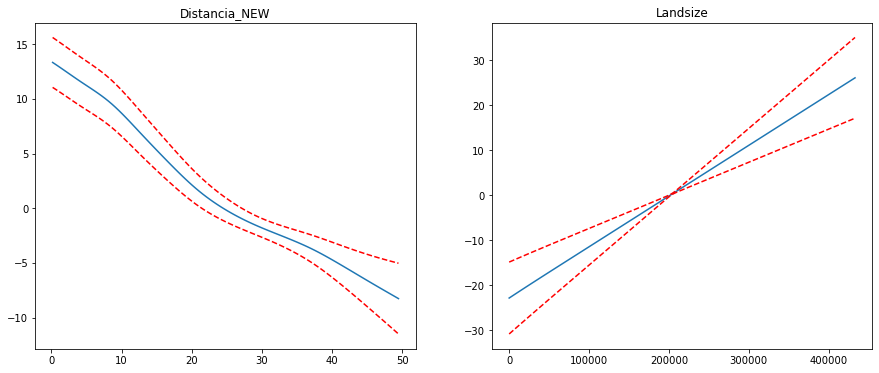

In [180]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
titles = ['Distancia_NEW','Landsize']

for i, ax in enumerate(axs):
    XX = model_3.generate_X_grid(term=i)
    pdep, confi = model_3.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  1% (1 of 100) |                        | Elapsed Time: 0:00:03 ETA:   0:05:50/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
 12% (12 of 100) |##                     | Elapsed Time: 0:01:15 ETA:   0:35:13/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 13%

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 23% (23 of 100) |#####                  | Elapsed Time: 0:02:31 ETA:   0:04:25/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distributi

 34% (34 of 100) |#######                | Elapsed Time: 0:03:25 ETA:   0:03:01/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 35% (35 of 100) |########               | Elapsed Time: 0:03:29 ETA:   0:03:41/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 46% (46 of 100) |##########             | Elapsed Time: 0:04:27 ETA:   0:02:38/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 47% (47 of 100) |##########             | Elapsed Time: 0:04:30 ETA:   0:02:49/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 60% (60 of 100) |#############          | Elapsed Time: 0:05:03 ETA:   0:01:31/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 61% (61 of 100) |##############         | Elapsed Time: 0:05:05 ETA:   0:01:46/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in tru

 85% (85 of 100) |###################    | Elapsed Time: 0:07:07 ETA:   0:00:48/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 86% (86 of 100) |###################    | Elapsed Time: 0:07:09 ETA:   0:00:30/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

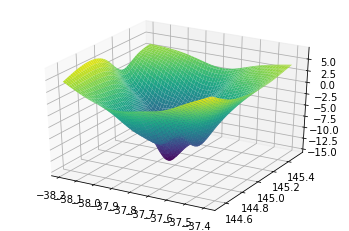

In [176]:
# Solo el tensor 
lams = np.random.rand(100, 4)
lams = lams * 11 - 3
lams = np.exp(lams)

fit_intercept= True 
n_splines=15
max_iter=100

model_3 = LogisticGAM(s(0)+te(2,3)+ s(1), fit_intercept=fit_intercept , n_splines=n_splines, max_iter=max_iter).gridsearch(X, y,  lam=lams)

XX = model_3.generate_X_grid(term=1, meshgrid=True)
Z = model_3.partial_dependence(term=1, X=XX, meshgrid=True)

ax = plt.axes(projection='3d')
ax.plot_surface(XX[0], XX[1], Z, cmap='viridis')

Al aumentar el numero de splines, también conseguimos un mejor rendimiento del modelo. Sin embargo el tiempo de ejecución aumenta mucho. 

Aumetaremos un poco más el número de splines para incrementar un poco mas la exactitud  pero sin peligro de sobreajuste.

In [185]:
#MODELO 4
lams = np.random.rand(100, 4)
lams = lams * 11 - 3
lams = np.exp(lams)

fit_intercept= True 
n_splines=20
max_iter=100

model_4 = LogisticGAM(s(0)+ s(1)+te(2,3), fit_intercept=fit_intercept , n_splines=n_splines, max_iter=max_iter).gridsearch(X, y,  lam=lams)
model_4.summary()
print("_________________________________________________________________________________________________")
print (" Accuracy del modelo con los datos de Train del Modelo 4 ", model_4.accuracy(X_train, y_train))

  1% (1 of 100) |                        | Elapsed Time: 0:00:08 ETA:   0:13:39/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  2% (2 of 100) |                        | Elapsed Time: 0:00:13 ETA:   0:09:00/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 13% (13 of 100) |##                     | Elapsed Time: 0:02:26 ETA:   0:11:37/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 16% (16 of 100) |###                    | Elapsed Time: 0:02:50 ETA:   0:09:44/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 27% (27 of 100) |######                 | Elapsed Time: 0:05:02 ETA:   0:07:20/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 28% (28 of 100) |######                 | Elapsed Time: 0:05:08 ETA:   0:06:50/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in tru

 40% (40 of 100) |#########              | Elapsed Time: 0:12:11 ETA:   0:38:38/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 41% (41 of 100) |#########              | Elapsed Time: 0:12:17 ETA:   0:05:47/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

/home/inma/anaconda3/lib/python3.8/site-packages/pygam/utils.py:725: RuntimeWarning: divide by zero encountered in true_divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
 51% (51 of 100) |###########            | Elapsed Time: 0:16:22 ETA:   1:45:15

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in tru

 65% (65 of 100) |##############         | Elapsed Time: 0:18:14 ETA:   0:04:24/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 66% (66 of 100) |###############        | Elapsed Time: 0:18:20 ETA:   0:03:37/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 79% (79 of 100) |##################     | Elapsed Time: 0:19:58 ETA:   0:01:51/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 80% (80 of 100) |##################     | Elapsed Time: 0:20:04 ETA:   0:01:54/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

 95% (95 of 100) |#####################  | Elapsed Time: 0:21:31 ETA:   0:00:36/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 96% (96 of 100) |###################### | Elapsed Time: 0:21:38 ETA:   0:00:25/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

did not converge


/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 99% (99 of 100) |###################### | Elapsed Time: 0:23:46 ETA:   0:00:07/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distributi

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     56.4432
Link Function:                        LogitLink Log Likelihood:                                 -8410.5842
Number of Samples:                        15138 AIC:                                            16934.0547
                                                AICc:                                              16934.5
                                                UBRE:                                               3.1216
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1984
Feature Function                  Lam

<ipython-input-185-d3660b150018>:11: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  model_4.summary()


In [201]:
pred=model_4.predict(X_test)
print(classification_report( y_test, pred))
print( confusion_matrix )
print (" Accuracy del modelo con los datos de Train del Modelo 4 ", model_4.accuracy(X, y))
print (" Accuracy del modelo con los datos de Test del Modelo 4 ", model_4.accuracy(X_test, y_test))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      3200
           1       0.70      0.78      0.74      3316

    accuracy                           0.72      6516
   macro avg       0.72      0.71      0.71      6516
weighted avg       0.72      0.72      0.71      6516

<function confusion_matrix at 0x7f5d5e3f94c0>
 Accuracy del modelo con los datos de Train del Modelo 4  0.7041881358171489
 Accuracy del modelo con los datos de Test del Modelo 4  0.7156230816451811


Finalmente obsevamos que en el Modelo 4 obtenemos merores resutados en el ajuste del modelo, procederemos a pintar las gráficas de dependencia para comprobar la interpretabilidad del modelo. 

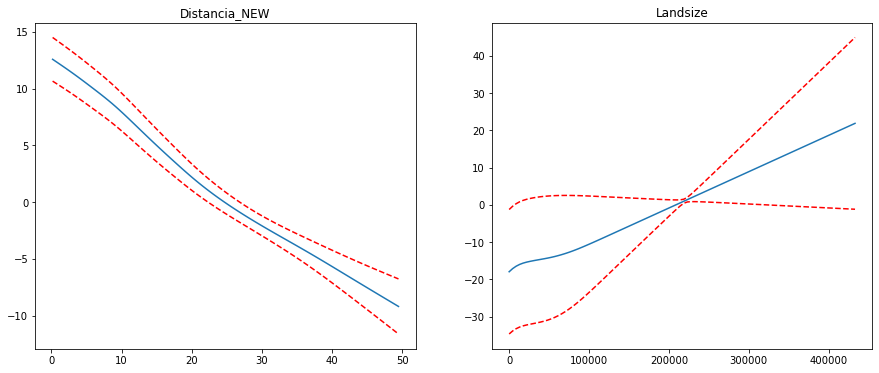

In [188]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
titles = ['Distancia_NEW','Landsize']

for i, ax in enumerate(axs):
    XX = model_4.generate_X_grid(term=i)
    pdep, confi = model_4.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/inma/anaconda3/lib/python3.8/sit

did not converge


 18% (2 of 11) |####                     | Elapsed Time: 0:00:09 ETA:   0:00:29/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 27% (3 of 11) |######                   | Elapsed Time: 0:00:10 ETA:   0:00:17/home/inma/anaconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/inma/anaconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encounter

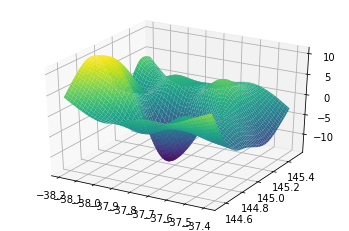

In [189]:
model_4 = LogisticGAM(s(0)+te(2,3)+ s(1)).gridsearch(X, y)
XX = model_4.generate_X_grid(term=1, meshgrid=True)
Z = model_4.partial_dependence(term=1, X=XX, meshgrid=True)

ax = plt.axes(projection='3d')
ax.plot_surface(XX[0], XX[1], Z, cmap='viridis')

Las gráficas de dependencia parecen igualmente interpretables como visualizamos en le primero de los modelos con la misma correlacion. En la gráfica del tensor,  podemos ver en dferencia la anterior ademas de la zona centrica de la gráfica con los precios bajo , tambien  hay una zona delimitada con precios más caros, que seguramente corresponde a la zona cara de la ciudad. 


## 7.2. Validación del modelo entrenado 


Una vez seleccionado el modelo  de GAM más optimo procedemos ha aplicar el modelo entrenado en los datos de validación para comprobar como se comporta. 

In [206]:
data = pd.read_csv('./CSV/csv_precio_div_validation.csv')
columns=['Distancia_NEW','Landsize','Longtitude','Lattitude','precio_div']

Validation=(data[columns])


#Seleccion de varaibles
X_val = Validation[['Distancia_NEW','Landsize','Lattitude','Longtitude']].values
y_val = Validation['precio_div'].values


In [207]:
pred=model_4.predict(X_val)
print(classification_report( y_val, pred))
print( confusion_matrix )
print (" Accuracy del modelo con los datos de Train del Modelo 4 ", model_4.accuracy(X, y))
print (" Accuracy del modelo con los datos de Test del Modelo 4 ", model_4.accuracy(X_val, y_val))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68      2664
           1       0.68      0.78      0.73      2738

    accuracy                           0.70      5402
   macro avg       0.71      0.70      0.70      5402
weighted avg       0.71      0.70      0.70      5402

<function confusion_matrix at 0x7f5d5e3f94c0>
 Accuracy del modelo con los datos de Train del Modelo 4  0.7041881358171489
 Accuracy del modelo con los datos de Test del Modelo 4  0.7036282858200666


Obtenemos un buen resultado  en la la exactitud de la prediccion de los datos de validación, por lo que pododemos concluir que es el  Modelo 4 con el ajuste de hiperparámetros previamente hecho es el que mejor se ajusta a estos datos entre los que se han probado. 